In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [39]:
# import warnings filter
from warnings import simplefilter

In [40]:
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

In [41]:
# read the dataset file
df = pd.read_csv('data.csv', header = None)

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

In [42]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [43]:
### 1 = male, 0 = female
df.isnull().sum()

df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['sex'] = df.sex.map({0: 'female', 1: 'male'})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df['sex'] = df.sex.map({'female': 0, 'male': 1})

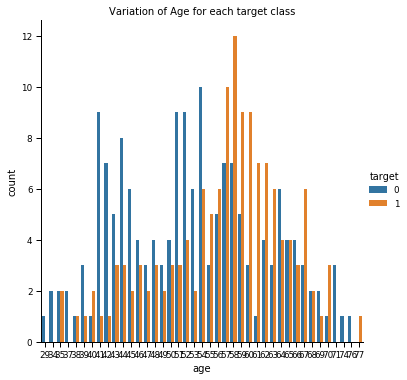

In [44]:
################################## Plots

# distribution of target vs age 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
plt.title('Variation of Age for each target class')
plt.show()

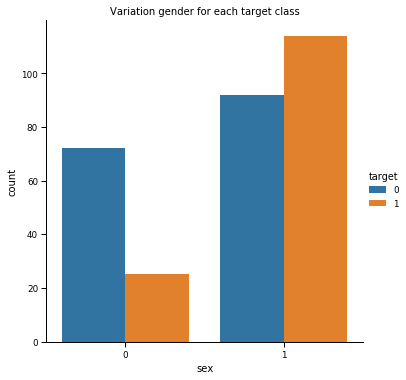

In [45]:
# distribution of target vs sex 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'sex', hue = 'target', order = df['sex'].sort_values().unique())
plt.title('Variation gender for each target class')
plt.show()

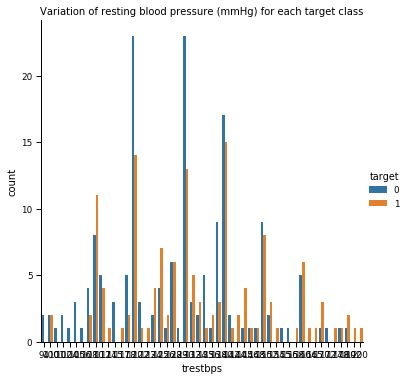

In [46]:
# distribution of target vs BP 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'trestbps', hue = 'target', order = df['trestbps'].sort_values().unique())
plt.title('Variation of resting blood pressure (mmHg) for each target class')
plt.show()

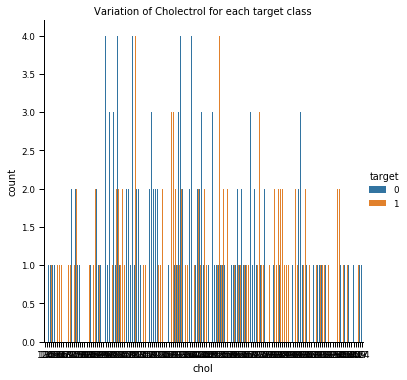

In [47]:
# distribution of target vs Chol 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'chol', hue = 'target', order = df['chol'].sort_values().unique())
plt.title('Variation of Cholectrol for each target class')
plt.show()

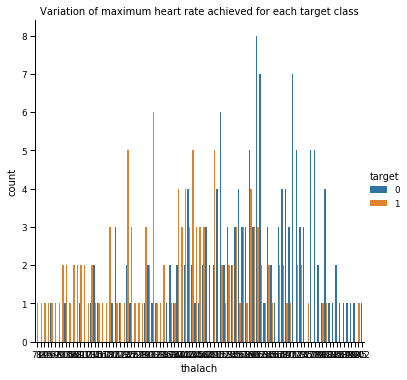

In [48]:
# distribution of target vs thalach 
sns.set_context("paper", font_scale = 1, rc = {"font.size": 10,"axes.titlesize": 10,"axes.labelsize": 10}) 
sns.catplot(kind = 'count', data = df, x = 'thalach', hue = 'target', order = df['thalach'].sort_values().unique())
plt.title('Variation of maximum heart rate achieved for each target class')
plt.show()

In [72]:
#trestbps
#chol
#Thalach


################################## data assignment
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
#########################################   SVM   #############################################################

classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [52]:
cm_test = confusion_matrix(y_pred, y_test)


In [53]:
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for svm = 0.9256198347107438
Accuracy for test set for svm = 0.8032786885245902


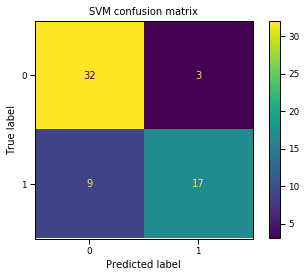

In [54]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("SVM confusion matrix")
plt.show()

In [55]:
matrix = confusion_matrix(y_train,y_pred_train, labels=[1,0])
print('Confusion matrix SVM: \n',matrix)

Confusion matrix SVM: 
 [[100  13]
 [  5 124]]


In [56]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report SVM : \n',matrix)

Classification report SVM : 
               precision    recall  f1-score   support

           1       0.95      0.88      0.92       113
           0       0.91      0.96      0.93       129

    accuracy                           0.93       242
   macro avg       0.93      0.92      0.92       242
weighted avg       0.93      0.93      0.93       242



In [57]:
#########################################   Logistic Regression  #############################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.8636363636363636
Accuracy for test set for Logistic Regression = 0.8032786885245902


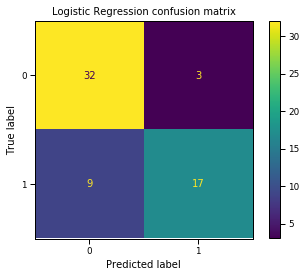

In [60]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("Logistic Regression confusion matrix")
plt.show()

In [61]:
matrix = confusion_matrix(y_train,y_pred_train, labels=[1,0])
print('Confusion matrix Logistic Regression: \n',matrix)

Confusion matrix Logistic Regression: 
 [[ 91  22]
 [ 11 118]]


In [62]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report Logistic Regression: \n',matrix)

Classification report Logistic Regression: 
               precision    recall  f1-score   support

           1       0.89      0.81      0.85       113
           0       0.84      0.91      0.88       129

    accuracy                           0.86       242
   macro avg       0.87      0.86      0.86       242
weighted avg       0.87      0.86      0.86       242



In [63]:
#########################################   Decision Tree  #############################################################

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [64]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7540983606557377


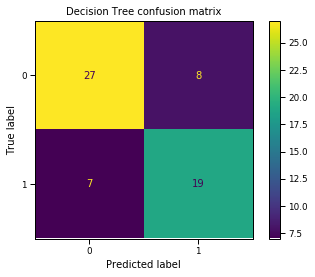

In [65]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("Decision Tree confusion matrix")
plt.show()

In [66]:
matrix = confusion_matrix(y_train,y_pred_train, labels=[1,0])
print('Confusion matrix Decision Tree: \n',matrix)

Confusion matrix Decision Tree: 
 [[113   0]
 [  0 129]]


In [67]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report Decision Tree: \n',matrix)

Classification report Decision Tree: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       113
           0       1.00      1.00      1.00       129

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [68]:
#########################################  Random Forest  #############################################################
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Random Forest = 0.9958677685950413
Accuracy for test set for Random Forest = 0.8032786885245902


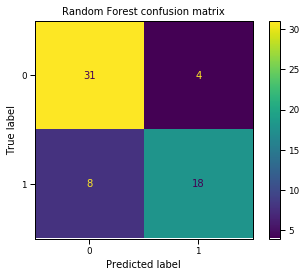

In [70]:
plot_confusion_matrix(classifier, X_test, y_test)  
plt.title("Random Forest confusion matrix")
plt.show()

In [71]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_train,y_pred_train,labels=[1,0])
print('Classification report Random Forest: \n',matrix)

Classification report Random Forest: 
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       113
           0       1.00      0.99      1.00       129

    accuracy                           1.00       242
   macro avg       1.00      1.00      1.00       242
weighted avg       1.00      1.00      1.00       242



In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
def Support_fun(commonVal,firstIDX,secondIDX):
    support = (len(commonVal)/(len(firstIDX)+len(secondIDX)))
    return support 

def Confidence_fun(commonVal,firstIDX):
    confidence = (len(commonVal)/len(firstIDX))
    return confidence

def Lift_fun(commonVal,firstIDX,secondIDX):
    lift = ((len(commonVal)/(len(firstIDX))/(len(secondIDX)/100)))
    return lift 

In [10]:
data_set = pd.read_csv('data.csv', header = None)

# Add columns names
data_set.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

# ###  separate the data_set two varibles
# target==1 class
target_class_1 = data_set[(data_set['target']==1) | (data_set['target']==2)|(data_set['target']==3) | (data_set['target']==5)]


In [13]:
# cp index values in target_calss_1 dataset
cp = target_class_1[target_class_1['cp']!=3]
cp = cp.iloc[:,:0]
cp.reset_index(inplace=True)

# cp index values in target_calss_1 dataset
trestbps = target_class_1[target_class_1['trestbps']>120]
trestbps = trestbps.iloc[:,:0]
trestbps.reset_index(inplace = True)

# chol index values in target_calss_1 dataset
chol = target_class_1[target_class_1['chol']>200]
chol = chol.iloc[:,:0]
chol.reset_index(inplace = True)

# fbs index values in target_calss_1 dataset
fbs = target_class_1[target_class_1['fbs']==1]
fbs = fbs.iloc[:,:0]
fbs.reset_index(inplace = True)

# thalach index values in target_calss_1 dataset
thalach=target_class_1[target_class_1['thalach']>100]
thalach=thalach.iloc[:,:0]
thalach.reset_index(inplace=True)

# restecg index values in target_calss_1 dataset
restecg=target_class_1[target_class_1['restecg']!=0]
restecg=restecg.iloc[:,:0]
restecg.reset_index(inplace=True)

# exang index values in target_calss_1 dataset
exang = target_class_1[target_class_1['exang']==1]
exang = exang.iloc[:,:0]
exang.reset_index(inplace  =True)

# ca index values in target_calss_1 dataset
ca=target_class_1[target_class_1['ca']>0]
ca=ca.iloc[:,:0]
ca.reset_index(inplace=True)

# thal index values in target_calss_1 dataset
thal=target_class_1[target_class_1['thal']!=3]
thal=thal.iloc[:,:0]
thal.reset_index(inplace=True)

In [14]:
#  3. common values in cp and other attributes
cpValue1 = pd.merge(cp,trestbps)
cpValue2 = pd.merge(cp,chol)
cpValue3 = pd.merge(cp,fbs)
cpValue4 = pd.merge(cp,restecg)
cpValue5 = pd.merge(cp,thalach)
cpValue6 = pd.merge(cp,exang)
cpValue7 = pd.merge(cp,ca)
cpValue8 = pd.merge(cp,thal)


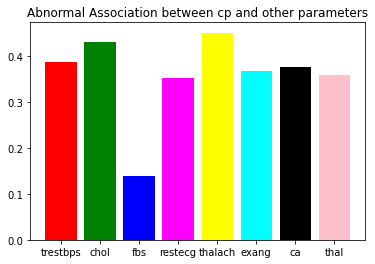

In [15]:
support1 = Support_fun(cpValue1,cp,trestbps)
support2 = Support_fun(cpValue2,cp,chol)
support3 = Support_fun(cpValue3,cp,fbs)
support4 = Support_fun(cpValue4,cp,restecg)
support5 = Support_fun(cpValue5,cp,thalach)
support6 = Support_fun(cpValue6,cp,exang)
support7 = Support_fun(cpValue7,cp,ca)
support8 = Support_fun(cpValue7,cp,thal)

support_cp = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_cp)

c= ['red', 'green', 'blue', 'magenta', 'yellow', 'cyan', 'black', 'pink']
x_axis = ["trestbps", "chol", 'fbs', 'restecg', 'thalach', 'exang', 'ca', 'thal']
plt.bar(x_axis,support_cp, color=c)
plt.title('Abnormal Association between cp and other parameters')
plt.show()

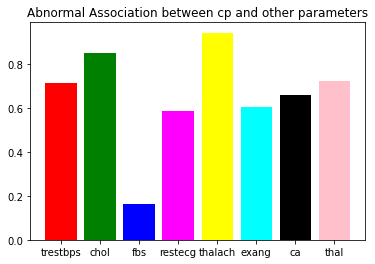

In [16]:
confidence1 = Confidence_fun(cpValue1,cp)
confidence2 = Confidence_fun(cpValue2,cp)
confidence3 = Confidence_fun(cpValue3,cp)
confidence4 = Confidence_fun(cpValue4,cp)
confidence5 = Confidence_fun(cpValue5,cp)
confidence6 = Confidence_fun(cpValue6,cp)
confidence7 = Confidence_fun(cpValue7,cp)
confidence8 = Confidence_fun(cpValue8,cp)

confidence_cp  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_cp)

plt.bar(x_axis,confidence_cp, color=c)
plt.title('Abnormal Association between cp and other parameters')
plt.show()

In [17]:
# 4. common values in trestbps and other attributes
trestbpsValue1 = pd.merge(trestbps,cp)
trestbpsValue2 = pd.merge(trestbps,chol)
trestbpsValue3 = pd.merge(trestbps,fbs)
trestbpsValue4 = pd.merge(trestbps,restecg)
trestbpsValue5 = pd.merge(trestbps,thalach)
trestbpsValue6 = pd.merge(trestbps,exang)
trestbpsValue7 = pd.merge(trestbps,ca)
trestbpsValue8 = pd.merge(trestbps,thal)

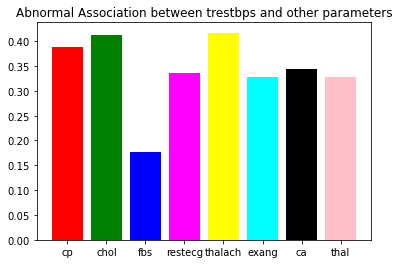

In [18]:
support1 = Support_fun(trestbpsValue1,trestbps,cp)
support2 = Support_fun(trestbpsValue2,trestbps,chol)
support3 = Support_fun(trestbpsValue3,trestbps,fbs)
support4 = Support_fun(trestbpsValue4,trestbps,restecg)
support5 = Support_fun(trestbpsValue5,trestbps,thalach)
support6 = Support_fun(trestbpsValue6,trestbps,exang)
support7 = Support_fun(trestbpsValue7,trestbps,ca)
support8 = Support_fun(trestbpsValue7,trestbps,thal)

support_trestbps = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_trestbps)
x_axis = ["cp", "chol", 'fbs', 'restecg', 'thalach', 'exang', 'ca', 'thal']
plt.bar(x_axis,support_trestbps, color=c)
plt.title('Abnormal Association between trestbps and other parameters')
plt.show()

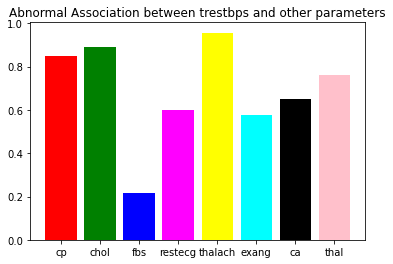

In [19]:
confidence1 = Confidence_fun(trestbpsValue1,trestbps)
confidence2 = Confidence_fun(trestbpsValue2,trestbps)
confidence3 = Confidence_fun(trestbpsValue3,trestbps)
confidence4 = Confidence_fun(trestbpsValue4,trestbps)
confidence5 = Confidence_fun(trestbpsValue5,trestbps)
confidence6 = Confidence_fun(trestbpsValue6,trestbps)
confidence7 = Confidence_fun(trestbpsValue7,trestbps)
confidence8 = Confidence_fun(trestbpsValue8,trestbps)

confidence_trestbps  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_trestbps)
plt.bar(x_axis,confidence_trestbps, color=c)
plt.title('Abnormal Association between trestbps and other parameters')
plt.show()

In [20]:
# 5. common values in chol and other attributes
cholValue1 = pd.merge(chol,cp)
cholValue2 = pd.merge(chol,trestbps)
cholValue3 = pd.merge(chol,fbs)
cholValue4 = pd.merge(chol,restecg)
cholValue5 = pd.merge(chol,thalach)
cholValue6 = pd.merge(chol,exang)
cholValue7 = pd.merge(chol,ca)
cholValue8 = pd.merge(chol,thal)

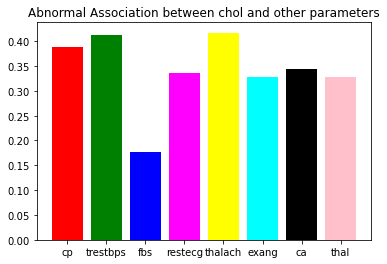

In [21]:
support1 = Support_fun(cholValue1,chol,cp)
support2 = Support_fun(cholValue2,chol,trestbps)
support3 = Support_fun(cholValue3,chol,fbs)
support4 = Support_fun(cholValue4,chol,restecg)
support5 = Support_fun(cholValue5,chol,thalach)
support6 = Support_fun(cholValue6,chol,exang)
support7 = Support_fun(cholValue7,chol,ca)
support8 = Support_fun(cholValue7,chol,thal)

support_chol = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_chol)
x_axis = ["cp", "trestbps", 'fbs', 'restecg', 'thalach', 'exang', 'ca', 'thal']
plt.bar(x_axis,support_trestbps, color=c)
plt.title('Abnormal Association between chol and other parameters')
plt.show()

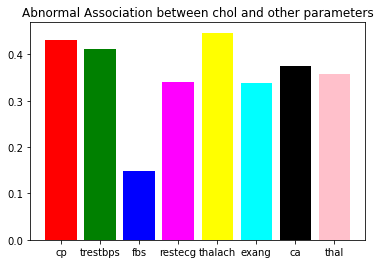

In [22]:
confidence1 = Confidence_fun(cholValue1,chol)
confidence2 = Confidence_fun(cholValue2,chol)
confidence3 = Confidence_fun(cholValue3,chol)
confidence4 = Confidence_fun(cholValue4,chol)
confidence5 = Confidence_fun(cholValue5,chol)
confidence6 = Confidence_fun(cholValue6,chol)
confidence7 = Confidence_fun(cholValue7,chol)
confidence8 = Confidence_fun(cholValue8,chol)

confidence_chol  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_chol)
plt.bar(x_axis,support_chol, color=c)
plt.title('Abnormal Association between chol and other parameters')
plt.show()

In [23]:
# 6. common values in fbs and other attributes
fbsValue1 = pd.merge(fbs,cp)
fbsValue2 = pd.merge(fbs,trestbps)
fbsValue3 = pd.merge(fbs,chol)
fbsValue4 = pd.merge(fbs,restecg)
fbsValue5 = pd.merge(fbs,thalach)
fbsValue6 = pd.merge(fbs,exang)
fbsValue7 = pd.merge(fbs,ca)
fbsValue8 = pd.merge(fbs,thal)

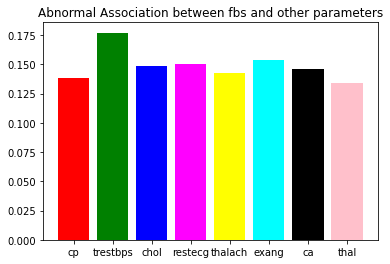

In [24]:
support1 = Support_fun(fbsValue1,fbs,cp)
support2 = Support_fun(fbsValue2,fbs,trestbps)
support3 = Support_fun(fbsValue3,fbs,chol)
support4 = Support_fun(fbsValue4,fbs,restecg)
support5 = Support_fun(fbsValue5,fbs,thalach)
support6 = Support_fun(fbsValue6,fbs,exang)
support7 = Support_fun(fbsValue7,fbs,ca)
support8 = Support_fun(fbsValue7,fbs,thal)

support_fbs = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_fbs)
x_axis = ["cp", "trestbps", 'chol', 'restecg', 'thalach', 'exang', 'ca', 'thal']
plt.bar(x_axis,support_fbs, color=c)
plt.title('Abnormal Association between fbs and other parameters')
plt.show()

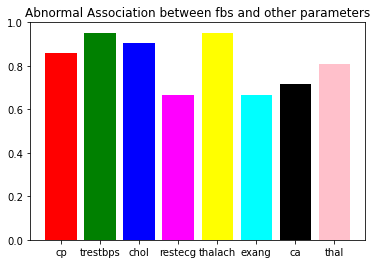

In [25]:
confidence1 = Confidence_fun(fbsValue1,fbs)
confidence2 = Confidence_fun(fbsValue2,fbs)
confidence3 = Confidence_fun(fbsValue3,fbs)
confidence4 = Confidence_fun(fbsValue4,fbs)
confidence5 = Confidence_fun(fbsValue5,fbs)
confidence6 = Confidence_fun(fbsValue6,fbs)
confidence7 = Confidence_fun(fbsValue7,fbs)
confidence8 = Confidence_fun(fbsValue8,fbs)

confidence_fbs  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_fbs)
plt.bar(x_axis,confidence_fbs, color=c)
plt.title('Abnormal Association between fbs and other parameters')
plt.show()

In [26]:
# 7. common values in restecg and other attributes
restecgValue1 = pd.merge(restecg,cp)
restecgValue2 = pd.merge(restecg,trestbps)
restecgValue3 = pd.merge(restecg,chol)
restecgValue4 = pd.merge(restecg,fbs)
restecgValue5 = pd.merge(restecg,thalach)
restecgValue6 = pd.merge(restecg,exang)
restecgValue7 = pd.merge(restecg,ca)
restecgValue8 = pd.merge(restecg,thal)

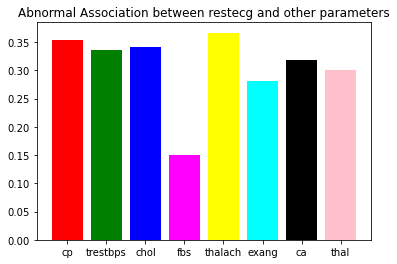

In [27]:
support1 = Support_fun(restecgValue1,restecg,cp)
support2 = Support_fun(restecgValue2,restecg,trestbps)
support3 = Support_fun(restecgValue3,restecg,chol)
support4 = Support_fun(restecgValue4,restecg,fbs)
support5 = Support_fun(restecgValue5,restecg,thalach)
support6 = Support_fun(restecgValue6,restecg,exang)
support7 = Support_fun(restecgValue7,restecg,ca)
support8 = Support_fun(restecgValue7,restecg,thal)

support_restecg = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_restecg)
x_axis = ["cp", "trestbps", 'chol', 'fbs', 'thalach', 'exang', 'ca', 'thal']
plt.bar(x_axis,support_restecg, color=c)
plt.title('Abnormal Association between restecg and other parameters')
plt.show()

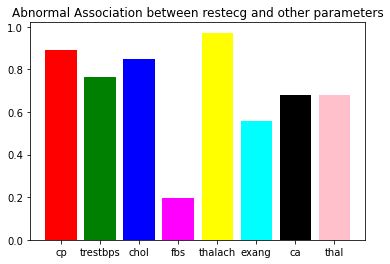

In [28]:
confidence1 = Confidence_fun(restecgValue1,restecg)
confidence2 = Confidence_fun(restecgValue2,restecg)
confidence3 = Confidence_fun(restecgValue3,restecg)
confidence4 = Confidence_fun(restecgValue4,restecg)
confidence5 = Confidence_fun(restecgValue5,restecg)
confidence6 = Confidence_fun(restecgValue6,restecg)
confidence7 = Confidence_fun(restecgValue7,restecg)
confidence8 = Confidence_fun(restecgValue8,restecg)

confidence_restecg  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_restecg)
plt.bar(x_axis,confidence_restecg, color=c)
plt.title('Abnormal Association between restecg and other parameters')
plt.show()

In [29]:
# 8. common values in thalach and other attributes
thalachValue1 = pd.merge(thalach,cp)
thalachValue2 = pd.merge(thalach,trestbps)
thalachValue3 = pd.merge(thalach,chol)
thalachValue4 = pd.merge(thalach,fbs)
thalachValue5 = pd.merge(thalach,restecg)
thalachValue6 = pd.merge(thalach,exang)
thalachValue7 = pd.merge(thalach,ca)
thalachValue8 = pd.merge(thalach,thal)

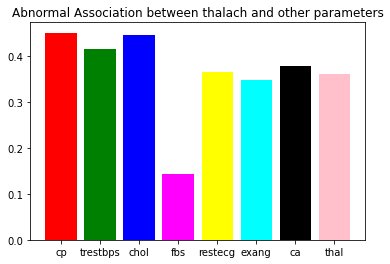

In [30]:
support1 = Support_fun(thalachValue1,thalach,cp)
support2 = Support_fun(thalachValue2,thalach,trestbps)
support3 = Support_fun(thalachValue3,thalach,chol)
support4 = Support_fun(thalachValue4,thalach,fbs)
support5 = Support_fun(thalachValue5,thalach,restecg)
support6 = Support_fun(thalachValue6,thalach,exang)
support7 = Support_fun(thalachValue7,thalach,ca)
support8 = Support_fun(thalachValue7,thalach,thal)

support_thalach = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_thalach)
x_axis = ["cp", "trestbps", 'chol', 'fbs', 'restecg', 'exang', 'ca', 'thal']
plt.bar(x_axis,support_thalach, color=c)
plt.title('Abnormal Association between thalach and other parameters')
plt.show()

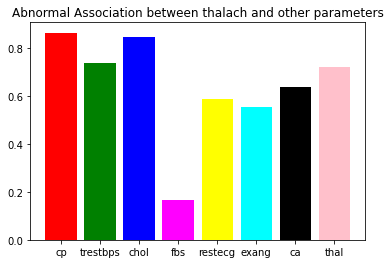

In [31]:
confidence1 = Confidence_fun(thalachValue1,thalach)
confidence2 = Confidence_fun(thalachValue2,thalach)
confidence3 = Confidence_fun(thalachValue3,thalach)
confidence4 = Confidence_fun(thalachValue4,thalach)
confidence5 = Confidence_fun(thalachValue5,thalach)
confidence6 = Confidence_fun(thalachValue6,thalach)
confidence7 = Confidence_fun(thalachValue7,thalach)
confidence8 = Confidence_fun(thalachValue8,thalach)

confidence_thalach  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_thalach)
plt.bar(x_axis,confidence_thalach, color=c)
plt.title('Abnormal Association between thalach and other parameters')
plt.show()

In [32]:
# 9. common values in exang and other attributes
exangValue1 = pd.merge(exang,cp)
exangValue2 = pd.merge(exang,trestbps)
exangValue3 = pd.merge(exang,chol)
exangValue4 = pd.merge(exang,fbs)
exangValue5 = pd.merge(exang,restecg)
exangValue6 = pd.merge(exang,thalach)
exangValue7 = pd.merge(exang,ca)
exangValue8 = pd.merge(exang,thal)

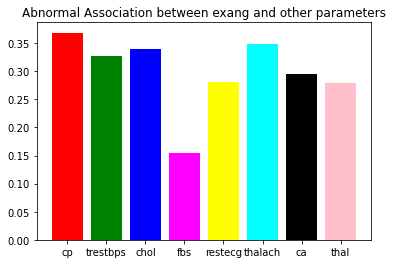

In [33]:
support1 = Support_fun(exangValue1,exang,cp)
support2 = Support_fun(exangValue2,exang,trestbps)
support3 = Support_fun(exangValue3,exang,chol)
support4 = Support_fun(exangValue4,exang,fbs)
support5 = Support_fun(exangValue5,exang,restecg)
support6 = Support_fun(exangValue6,exang,thalach)
support7 = Support_fun(exangValue7,exang,ca)
support8 = Support_fun(exangValue7,exang,thal)

support_exang = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_exang)
x_axis = ["cp", "trestbps", 'chol', 'fbs', 'restecg', 'thalach', 'ca', 'thal']
plt.bar(x_axis,support_exang, color=c)
plt.title('Abnormal Association between exang and other parameters')
plt.show()

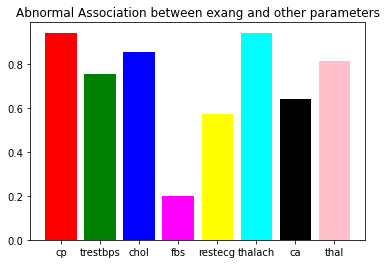

In [34]:
confidence1 = Confidence_fun(exangValue1,exang)
confidence2 = Confidence_fun(exangValue2,exang)
confidence3 = Confidence_fun(exangValue3,exang)
confidence4 = Confidence_fun(exangValue4,exang)
confidence5 = Confidence_fun(exangValue5,exang)
confidence6 = Confidence_fun(exangValue6,exang)
confidence7 = Confidence_fun(exangValue7,exang)
confidence8 = Confidence_fun(exangValue8,exang)

confidence_exang  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_exang)
plt.bar(x_axis,confidence_exang, color=c)
plt.title('Abnormal Association between exang and other parameters')
plt.show()

In [35]:
# 12. common values in ca and other attributes
caValue1 = pd.merge(ca,cp)
caValue2 = pd.merge(ca,trestbps)
caValue3 = pd.merge(ca,chol)
caValue4 = pd.merge(ca,fbs)
caValue5 = pd.merge(ca,restecg)
caValue6 = pd.merge(ca,thalach)
caValue7 = pd.merge(ca,exang)
caValue8 = pd.merge(ca,thal)

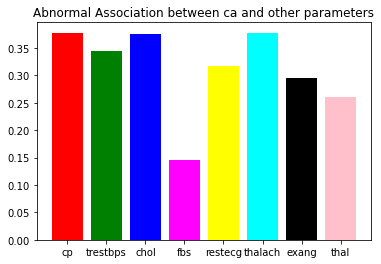

In [36]:
support1 = Support_fun(caValue1,ca,cp)
support2 = Support_fun(caValue2,ca,trestbps)
support3 = Support_fun(caValue3,ca,chol)
support4 = Support_fun(caValue4,ca,fbs)
support5 = Support_fun(caValue5,ca,restecg)
support6 = Support_fun(caValue6,ca,thalach)
support7 = Support_fun(caValue7,ca,exang)
support8 = Support_fun(caValue7,ca,thal)

support_ca = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_ca)
x_axis = ["cp", "trestbps", 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'thal']
plt.bar(x_axis,support_ca, color=c)
plt.title('Abnormal Association between ca and other parameters')
plt.show()

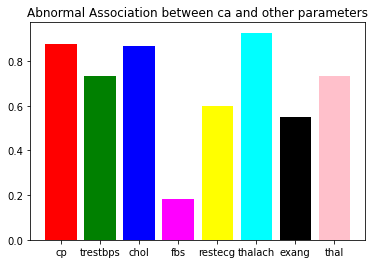

In [37]:
confidence1 = Confidence_fun(caValue1,ca)
confidence2 = Confidence_fun(caValue2,ca)
confidence3 = Confidence_fun(caValue3,ca)
confidence4 = Confidence_fun(caValue4,ca)
confidence5 = Confidence_fun(caValue5,ca)
confidence6 = Confidence_fun(caValue6,ca)
confidence7 = Confidence_fun(caValue7,ca)
confidence8 = Confidence_fun(caValue8,ca)

confidence_ca  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_ca)
plt.bar(x_axis,confidence_ca, color=c)
plt.title('Abnormal Association between ca and other parameters')
plt.show()

In [38]:
# 13. common values in thal and other attributes
thalValue1 = pd.merge(thal,cp)
thalValue2 = pd.merge(thal,trestbps)
thalValue3 = pd.merge(thal,chol)
thalValue4 = pd.merge(thal,fbs)
thalValue5 = pd.merge(thal,restecg)
thalValue6 = pd.merge(thal,thalach)
thalValue7 = pd.merge(thal,exang)
thalValue8 = pd.merge(thal,ca)

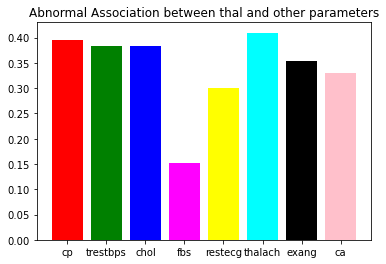

In [39]:
support1 = Support_fun(thalValue1,thal,cp)
support2 = Support_fun(thalValue2,thal,trestbps)
support3 = Support_fun(thalValue3,thal,chol)
support4 = Support_fun(thalValue4,thal,fbs)
support5 = Support_fun(thalValue5,thal,restecg)
support6 = Support_fun(thalValue6,thal,thalach)
support7 = Support_fun(thalValue7,thal,exang)
support8 = Support_fun(thalValue7,thal,ca)

support_thal = [support1, support2, support3, support4, support5, support6, support7, support8]
#print(support_thal)
x_axis = ["cp", "trestbps", 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'ca']
plt.bar(x_axis,support_thal, color=c)
plt.title('Abnormal Association between thal and other parameters')
plt.show()

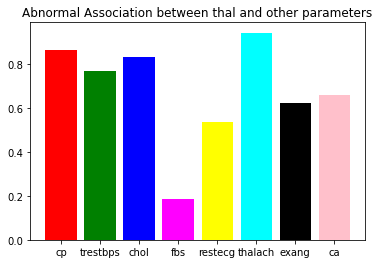

In [40]:
confidence1 = Confidence_fun(thalValue1,thal)
confidence2 = Confidence_fun(thalValue2,thal)
confidence3 = Confidence_fun(thalValue3,thal)
confidence4 = Confidence_fun(thalValue4,thal)
confidence5 = Confidence_fun(thalValue5,thal)
confidence6 = Confidence_fun(thalValue6,thal)
confidence7 = Confidence_fun(thalValue7,thal)
confidence8 = Confidence_fun(thalValue8,thal)

confidence_thal  = [confidence1, confidence2, confidence3, confidence4, confidence5, confidence6, confidence7, confidence8]
#print(confidence_thal)
plt.bar(x_axis,confidence_thal, color=c)
plt.title('Abnormal Association between thal and other parameters')
plt.show()